## 10.1 卷积神经网络简介

![](./lesson_img/16.jpg)

### 将建立如下图所示的卷积神经网络

![](./lesson_img/17.jpg)

### 卷积神经网络可以分为以下两大部分

![](./lesson_img/18.jpg)

## 10.2 数据预处理

In [1]:
# 导入所需模块
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

In [2]:
# 读取CIFAR-10数据
(x_train_img, y_train_label),(x_test_img, y_test_label) = cifar10.load_data()

In [6]:
# 显示训练和验证数据的shape
print('x_train_img.shape: ', x_train_img.shape, ' y_train_label.shape: ', y_train_label.shape)
print('x_test_img.shape: ', x_test_img.shape, ' y_test_label.shape: ', y_test_label.shape)

x_train_img.shape:  (50000, 32, 32, 3)  y_train_label.shape:  (50000, 1)
x_test_img.shape:  (10000, 32, 32, 3)  y_test_label.shape:  (10000, 1)


In [7]:
# 将features（照片的特征值）标准化
# 标准化可以提高预测精度，并且可以更快收敛
x_train_img_normalize = x_train_img.astype('float32') / 255.0
x_test_img_normalize = x_test_img.astype('float32') / 255.0

In [8]:
# label以一位有效编码进行转换
from keras.utils import np_utils
y_train_label_OneHot = np_utils.to_categorical(y_train_label)
y_test_label_OneHot = np_utils.to_categorical(y_test_label)

## 10.3 建立模型

In [11]:
# 1.导入所需模块
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Activation
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

### 将使用下面的方法建立卷积神经网络
![](./lesson_img/19.jpg)

In [12]:
# 2. 建立模型
model = Sequential()

In [13]:
# 3. 建立卷积层1和池化层1（一个完整的卷积运算包含 一个卷积层和一个池化层）
# 建立卷积层1
model.add(Conv2D(filters=32,
                                kernel_size=(3, 3),
                                input_shape=(32, 32, 3),
                                activation='relu',
                                padding='same'))

![](./lesson_img/20.jpg)

In [14]:
# 加入DropOut，避免过度拟合
model.add(Dropout(rate=0.25))

In [15]:
# 建立池化层1，执行缩减采样
model.add(MaxPooling2D(pool_size=(2,2)))

In [16]:
# 4.建立卷积层2和池化层2
model.add(Conv2D(filters=64,
                                kernel_size=(3, 3),
                                activation='relu',
                                padding='same'))

In [17]:
# 加入DropOut，避免过度拟合
model.add(Dropout(rate=0.25))

In [18]:
# 建立池化层2，执行第二次缩减采样
model.add(MaxPooling2D(pool_size=(2,2)))

In [19]:
# 5. 建立神经网络层（平坦层，隐藏层， 输出层）
# 建立平坦层
model.add(Flatten())
model.add(Dropout(0.25))

In [20]:
# 建立隐藏层
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.25))

In [21]:
# 建立输出层
model.add(Dense(10, activation='softmax'))

In [22]:
# 6. 查看模型摘要
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

![](./lesson_img/21.jpg)

## 10.4 进行训练

In [23]:
# 定义训练方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
train_history = model.fit(x=x_train_img_normalize, y=y_train_label_OneHot,
                                     validation_split=0.2, epochs=10, batch_size=128, verbose=2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
 - 241s - loss: 1.5008 - acc: 0.4609 - val_loss: 1.2841 - val_acc: 0.5812
Epoch 2/10
 - 236s - loss: 1.1380 - acc: 0.5958 - val_loss: 1.1162 - val_acc: 0.6351
Epoch 3/10
 - 243s - loss: 0.9797 - acc: 0.6552 - val_loss: 1.0264 - val_acc: 0.6580
Epoch 4/10
 - 268s - loss: 0.8737 - acc: 0.6922 - val_loss: 0.9549 - val_acc: 0.6879
Epoch 5/10
 - 257s - loss: 0.7854 - acc: 0.7238 - val_loss: 0.8833 - val_acc: 0.7056
Epoch 6/10
 - 241s - loss: 0.6981 - acc: 0.7530 - val_loss: 0.8423 - val_acc: 0.7215
Epoch 7/10
 - 257s - loss: 0.6220 - acc: 0.7809 - val_loss: 0.8187 - val_acc: 0.7249
Epoch 8/10
 - 251s - loss: 0.5516 - acc: 0.8060 - val_loss: 0.7701 - val_acc: 0.7461
Epoch 9/10
 - 254s - loss: 0.4844 - acc: 0.8314 - val_loss: 0.7885 - val_acc: 0.7293
Epoch 10/10
 - 244s - loss: 0.4360 - acc: 0.8480 - val_loss: 0.7712 - val_acc: 0.7351


In [25]:
# 建立show_train_history显示训练过程
# 可以使用如下方法，读取train_history，以图表显示训练过程。
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.xlabel('Epoch')
    plt.ylabel('Train')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

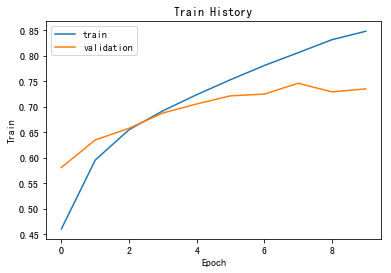

In [26]:
# 画出准确率的执行结果
show_train_history(train_history, 'acc', 'val_acc')

![](./lesson_img/22.jpg)

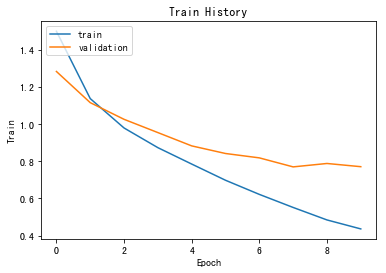

In [27]:
# 画出误差的执行结果
show_train_history(train_history, 'loss', 'val_loss')

![](./lesson_img/23.jpg)

## 10.5 评估模型的准确率

In [29]:
scores = model.evaluate(x_test_img_normalize, y_test_label_OneHot)
scores[1]

10000/10000 [==============================] - 18s 2ms/step


0.729

## 10.6 预测

In [30]:
prediction = model.predict_classes(x_test_img_normalize)

In [31]:
# 显示前10项的预测结果
prediction[:10]

array([5, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=int64)

In [32]:
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num > 25:
        num = 25
        pass
    for i in range(0, num):
        ax = plt.subplot(5, 5, i+1) #建立 subgraph子图形 为 5行 5列
        ax.imshow(images[idx], cmap='binary') # 画出 subgraph 子图形
        title= 'label=' + str(labels[idx]) # 设置子图形的title， 显示标签字段
        if len(prediction)>0: # 如果传入的预测结果
            title += ', predict='+str(prediction[idx]) # 标题
        ax.set_title(title, fontsize=10) # 设置子图形的标题
        ax.set_xticks([]) # 设置不显示刻度
        ax.set_yticks([])
        idx+=1
    plt.show()

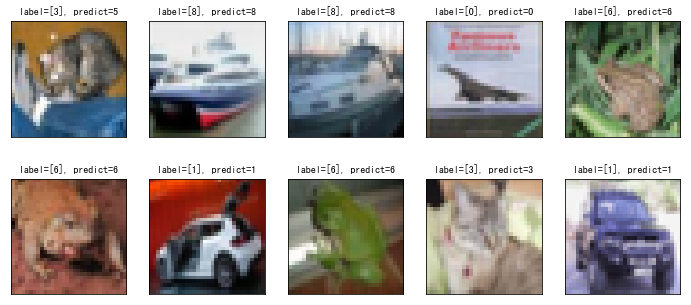

In [33]:
# 显示前10项预测结果
plot_images_labels_prediction(x_test_img, y_test_label, prediction, 0, 10)

### label_dict = {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

## 10.7 查看预测概率
### 有时候我们不只希望知道预测结果,还想要知道预测的每一种类别的概率

In [34]:
# 1.使用测试数据进行预测
predict_probablity = model.predict(x_test_img_normalize)

In [36]:
label_dict = {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

In [43]:
# 建立显示函数
def show_predict_probablity(y, prediction, x_img, predict_probablity, i):
    print('label: ', label_dict[y[i][0]], ' predict: ', label_dict[prediction[i]])
    plt.figure()
    plt.imshow(np.reshape(x_test_img[i], (32, 32, 3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+' Probability: %1.9f'%(predict_probablity[i][j]))
    

![](./lesson_img/24.jpg)

label:  cat  predict:  dog


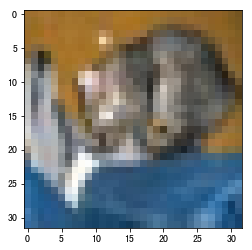

airplane Probability: 0.000773145
automobile Probability: 0.005310745
bird Probability: 0.005663403
cat Probability: 0.474814862
deer Probability: 0.006578487
dog Probability: 0.486657679
frog Probability: 0.012345319
horse Probability: 0.003436348
ship Probability: 0.003919622
truck Probability: 0.000500482


In [44]:
show_predict_probablity(y_test_label, prediction, x_test_img, predict_probablity, 0)

#### 从以上结果可以看出，这张照片预测为“狗”的概率最高，预测为“猫”的概率次高，所以最后预测为狗

#### 但是真实值是“猫”，所以此次预测错误

## 10.8 显示混淆矩阵

In [45]:
prediction.shape

(10000,)

In [46]:
y_test_label.shape

(10000, 1)

### 我们使用pd.crosstab 建立混淆矩阵，但是pd.crosstab的输入都必须是一维数组，所以必须先确认prediction(预测结果)和y_test_label(真实值)是一维数组，如果不是一维数组，则必须先转换为一维数组

In [54]:
# 转换为一维数组
print(y_test_label.reshape(1, 10000)[0])
print(y_test_label.reshape(1, 10000)[0].shape)

[3 8 8 ... 5 1 7]
(10000,)


In [55]:
import pandas as pd

In [57]:
print(len(prediction))
print(len(y_test_label.reshape(1, 10000)[0]))

10000
10000


In [58]:
prediction

array([5, 8, 8, ..., 5, 1, 7], dtype=int64)

In [59]:
y_test_label.reshape(1, 10000)[0]

array([3, 8, 8, ..., 5, 1, 7])

In [67]:
# crosstab 第一个参数是列, 第二个参数是行
# pd.crosstab(prediction, y_test_label.reshape(1, 10000)[0], rownames=['prediction'], colnames=['label'])
print(label_dict)
pd.crosstab(y_test_label.reshape(1, 10000)[0], prediction, rownames=['label'], colnames=['prediction'])

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


prediction,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,795,11,77,12,17,7,16,6,34,25
1,25,827,22,8,5,7,19,2,20,65
2,52,3,648,24,90,63,91,18,4,7
3,16,9,107,434,78,182,129,28,6,11
4,17,2,86,38,719,22,81,28,5,2
5,12,3,67,106,53,657,57,38,3,4
6,2,3,35,27,12,19,899,1,1,1
7,15,1,47,27,76,57,20,751,2,4
8,67,29,36,13,10,12,16,1,795,21


### 从以上混淆矩阵，我们观察如下：
- **对角线是预测正确的，我们发现**  
    - 真实值是6“蛙”，被正确预测为6“蛙”的项数有899项，最高，最不容易混淆  
    - 真实值是3“猫”，被正确预测为3“猫”的项数有434项，最低，也就是说最容易混淆  
- **其他非对角线的数字代表将某一个标签预测为另一个标签，最容易混淆**
    - 真实值是3“猫”，但预测是5“狗”，项数有182项，最高，也就是说“猫”很容易被认成“狗”
    - 同理还可以发现“猫”也容易被认成“蛙”，有129项；以及“狗”容易被认成“猫”，有106项

### 我们还发现了一些有趣的现象：
![](./lesson_img/26.jpg)

- **但是 8,9 被预测为1的概率都分别是十位数。也就是说，8（船），9（卡车）属于交通工具，容易混淆为1（汽车）**

![](./lesson_img/27.jpg)

## 10.9 建立3次的卷积运算神经网络

### 之前建立的卷积神经网络执行结果的准确率只有0.729（10.5节），我们希望能通过更多次卷积运算提高准确率

In [70]:
model = Sequential()

#### 建立卷积层1与池化层1

In [71]:
# 建立卷积层1
model.add(Conv2D(filters=32,
                                kernel_size=(3, 3),
                                input_shape=(32, 32, 3),
                                activation='relu',
                                padding='same'))
# 加入DropOut，避免过度拟合
model.add(Dropout(rate=0.3))

# 【新增加Conv2D 层】
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))

# 建立池化层1，执行缩减采样
model.add(MaxPooling2D(pool_size=(2,2)))

#### 建立卷积层2与池化层2

In [72]:
# 建立卷积层2
model.add(Conv2D(filters=64,
                                kernel_size=(3, 3),
                                activation='relu',
                                padding='same'))
# 加入DropOut，避免过度拟合
model.add(Dropout(rate=0.3))

# 【新增加Conv2D 层】
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))

# 建立池化层2，执行缩减采样
model.add(MaxPooling2D(pool_size=(2,2)))

#### 建立卷积层3和池化层3

In [73]:
# 建立卷积层3
model.add(Conv2D(filters=128,
                                kernel_size=(3, 3),
                                activation='relu',
                                padding='same'))
# 加入DropOut，避免过度拟合
model.add(Dropout(rate=0.3))

# 【新增加Conv2D 层】
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))

# 建立池化层3，执行缩减采样
model.add(MaxPooling2D(pool_size=(2,2)))

#### 建立神经网络层（平坦层，隐藏层1，隐藏层2，输出层）

**我们建立更宽，更深的神经网络， 加入隐藏层1（2500个神经元）和隐藏层2（1500个神经元）。**

In [74]:
# 平坦层
model.add(Flatten())
model.add(Dropout(0.3))
# 隐藏层1
model.add(Dense(2500, activation='relu'))
model.add(Dropout(0.3))
# 隐藏层2
model.add(Dense(1500, activation='relu'))
model.add(Dropout(0.3))
# 输出层
model.add(Dense(10, activation='softmax'))

#### 训练模型

#### 为了增加准确率,执行50个训练周期，这需要花很长时间

In [76]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### 这里默认tensorflow是CPU版本，训练模型时间太长，转到 10.1Keras-gpu 文件中训练，以下是训练结果

![](./lesson_img/28.jpg)

![](./lesson_img/29.jpg)